In [84]:
import sys

sys.path.append("../src")

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
from scipy.optimize import minimize
import sto_ng
import gaussian_overlap_function
import h5py

importlib.reload(sto_ng)
importlib.reload(gaussian_overlap_function)
from sto_ng import *
from gaussian_overlap_function import *

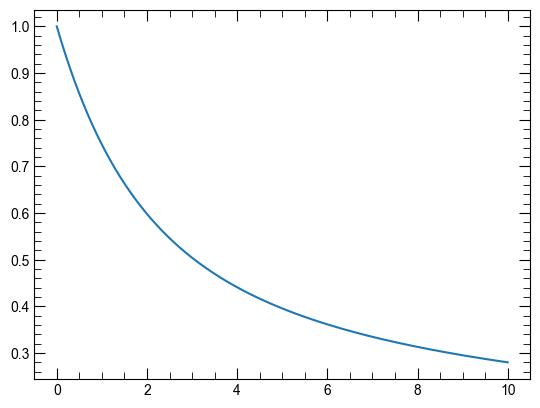

In [86]:
x = np.linspace(0, 10, 1000)
y = F(x)
plt.plot(x, y)

In [87]:
with h5py.File("sto_ng.h5", "r") as f:
    optimized_params_1s = f["1s/sto-3g/optimized_params"][:]
    optimized_params_2s2p = f["2s2p/sto-2g/optimized_params"][:]

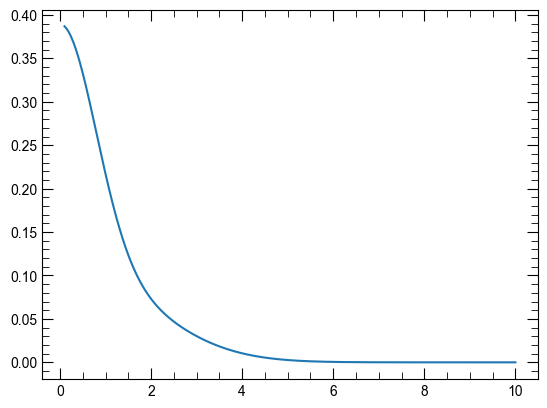

In [88]:
approximator = GaussianApproximator1s(optimized_params_1s, 1.0)
r = np.linspace(0.1, 10, 1000)
y = approximator.phi_approx_g1s(optimized_params_1s, r)
fig, ax = plt.subplots()
ax.plot(r, y)

In [89]:
optimized_params_1s

array([8.51761539e-01, 4.30165617e-01, 2.16840434e-19, 4.21840235e-01,
       1.51610304e-01, 6.78882237e-01])

In [90]:
RA = np.ndarray([0, 0, 0])
RB = np.ndarray([0, 0, 0])
RC = np.ndarray([0, 0, 0])

In [91]:
V(1, 1, RA, RB, RC)

-1.5957691215525387

In [92]:
def energy(scale):
    result = 0
    for i in range(3):
        for j in range(3):
            alpha_i = optimized_params_1s[2 * i] * scale**2
            alpha_j = optimized_params_1s[2 * j] * scale**2
            c_i = optimized_params_1s[2 * i + 1]
            c_j = optimized_params_1s[2 * j + 1]
            result += (
                c_i
                * c_j
                * (T(alpha_i, alpha_j, RA, RB) + V(alpha_i, alpha_j, RA, RB, RC))
            )
            # result += c_i * c_j * (T(alpha_i, alpha_j) + V(alpha_i, alpha_j))
    return result

In [93]:
minimize(energy, 1.0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.4811591481880271
        x: [ 1.003e+00]
      nit: 2
      jac: [-2.235e-08]
 hess_inv: [[ 1.046e+00]]
     nfev: 6
     njev: 3

In [94]:
results = []
scales = np.linspace(0.0, 1.5, 100)
for scale in scales:
    results.append(energy(scale))

/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:15: RuntimeWarning: invalid value encountered in scalar divide
  alpha
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:18: RuntimeWarning: invalid value encountered in scalar divide
  * (6 - 4 * alpha * beta / (alpha + beta) * np.linalg.norm(RA - RB) ** 2)
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  * (np.pi / (alpha + beta)) ** (3 / 2)
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:20: RuntimeWarning: invalid value encountered in scalar divide
  * np.exp(-alpha * beta * np.linalg.norm(RA - RB) ** 2 / (alpha + beta))
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  -2
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:32: RuntimeWarning:

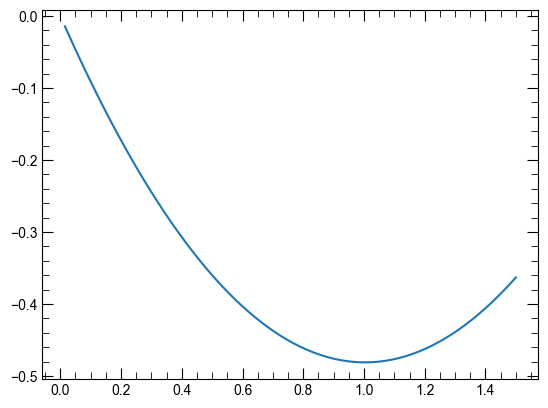

In [95]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.0, 1.5, 100), results)

In [96]:
optimized_params_1s[0] * optimized_params_1s[1]

0.3663985280399792

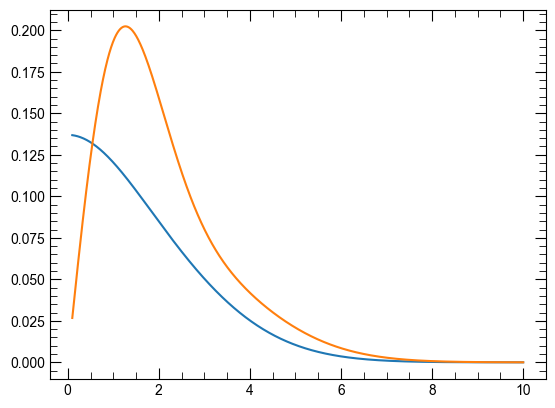

In [97]:
approximator = GaussianApproximator2s2p(optimized_params_2s2p, 1.0)
r = np.linspace(0.1, 10, 1000)
y2s = approximator.phi_approx_g1s(optimized_params_2s2p, r)
y2p = approximator.phi_approx_g2p(optimized_params_2s2p, r)
fig, ax = plt.subplots()
ax.plot(r, y2s)
ax.plot(r, y2p)